In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split



In [22]:
# Step 1
data = pd.read_csv("iris.csv")
print(data.head())

# Step 2


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [23]:
y = data.pop("Species")

# Step 3


In [24]:
y = y.replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])



In [25]:
print("\nNumber of missing values for each feature:")
print(data.isnull().sum())



Number of missing values for each feature:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


In [26]:
impute = SimpleImputer(missing_values=np.nan, strategy='median')
X = impute.fit_transform(data)

In [27]:


# Step 6
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    test_size=0.25, stratify=y)



In [28]:


# Step 1
N, p = X_train.shape
classes = np.unique(y)
print("Training set contains {} samples each with {} features.".format(N, p))
print("There are {} classes to be classified.\n".format(len(classes)))

# Step 2


Training set contains 112 samples each with 5 features.
There are 3 classes to be classified.



In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [36]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [37]:
training_acc = knn.score(X_train, y_train)
print("Training accuracy of K-NN classifier (K=3) = {:.4f}".format(training_acc))

Training accuracy of K-NN classifier (K=3) = 1.0000


In [40]:


test_acc = knn.score(X_test, y_test)
print("Test accuracy of K-NN classifier (K=3) = {:.4f}".format(test_acc))

Test accuracy of K-NN classifier (K=3) = 1.0000


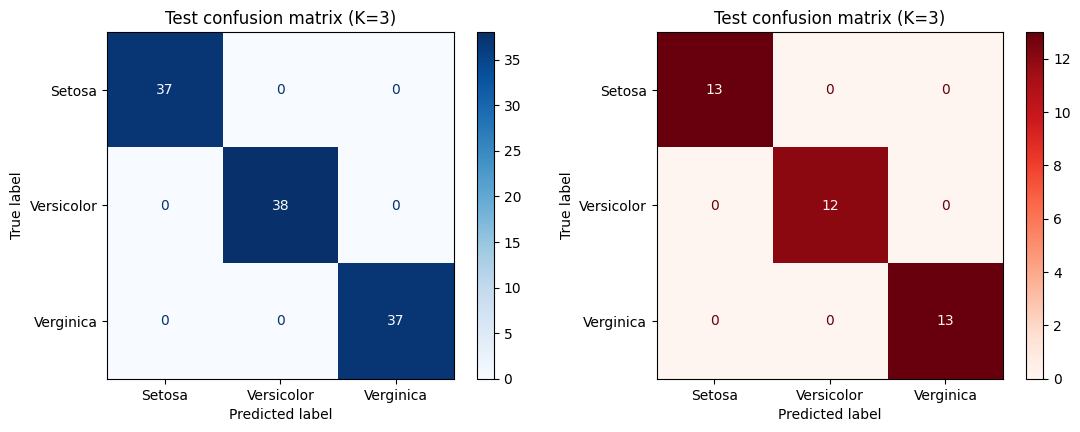

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize=(13,4.5))

train_prediction = knn.predict(X_train)
test_prediction = knn.predict(X_test)

cm_train = confusion_matrix(y_train, train_prediction, labels=knn.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_train,  
                    display_labels= ['Setosa', 'Versicolor', 'Verginica']).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Test confusion matrix (K=3)')

cm_test = confusion_matrix(y_test, test_prediction, labels=knn.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_test, 
                     display_labels= ['Setosa', 'Versicolor', 'Verginica']).plot(ax=ax[1], cmap='Reds')
ax[1].set_title('Test confusion matrix (K=3)')
plt.show()